In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools

In [2]:
application_data = pd.read_csv(r'Resources/application_data.csv')

In [3]:
previous_application = pd.read_csv(r'Resources/previous_application.csv')

In [4]:
columns_description = pd.read_csv(r'Resources/columns_description.csv')

In [5]:
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [7]:
columns_description.head(100)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
95,98,application_data,DAYS_LAST_PHONE_CHANGE,How many days before application did client ch...,NaN
96,99,application_data,FLAG_DOCUMENT_2,Did client provide document 2,NaN
97,100,application_data,FLAG_DOCUMENT_3,Did client provide document 3,NaN
98,101,application_data,FLAG_DOCUMENT_4,Did client provide document 4,NaN


In [8]:
print ("application_data     :",application_data.shape)
print ("previous_application :",previous_application.shape)
print ("columns_description  :",columns_description.shape)

application_data     : (307511, 122)
previous_application : (1670214, 37)
columns_description  : (160, 5)


In [9]:
pip install missingno 

In [10]:
import missingno as msno

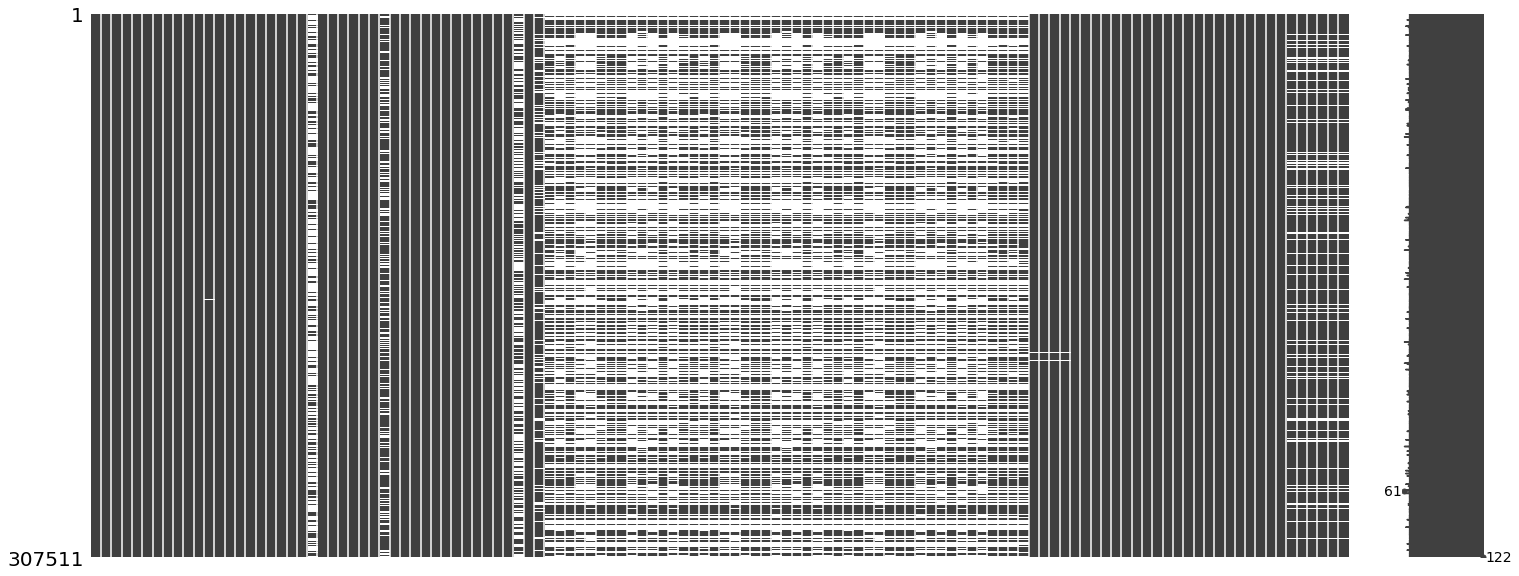

<Figure size 1080x648 with 0 Axes>

In [11]:
msno.matrix(application_data)
plt.figure(figsize = (15,9))
plt.show()

<AxesSubplot:>

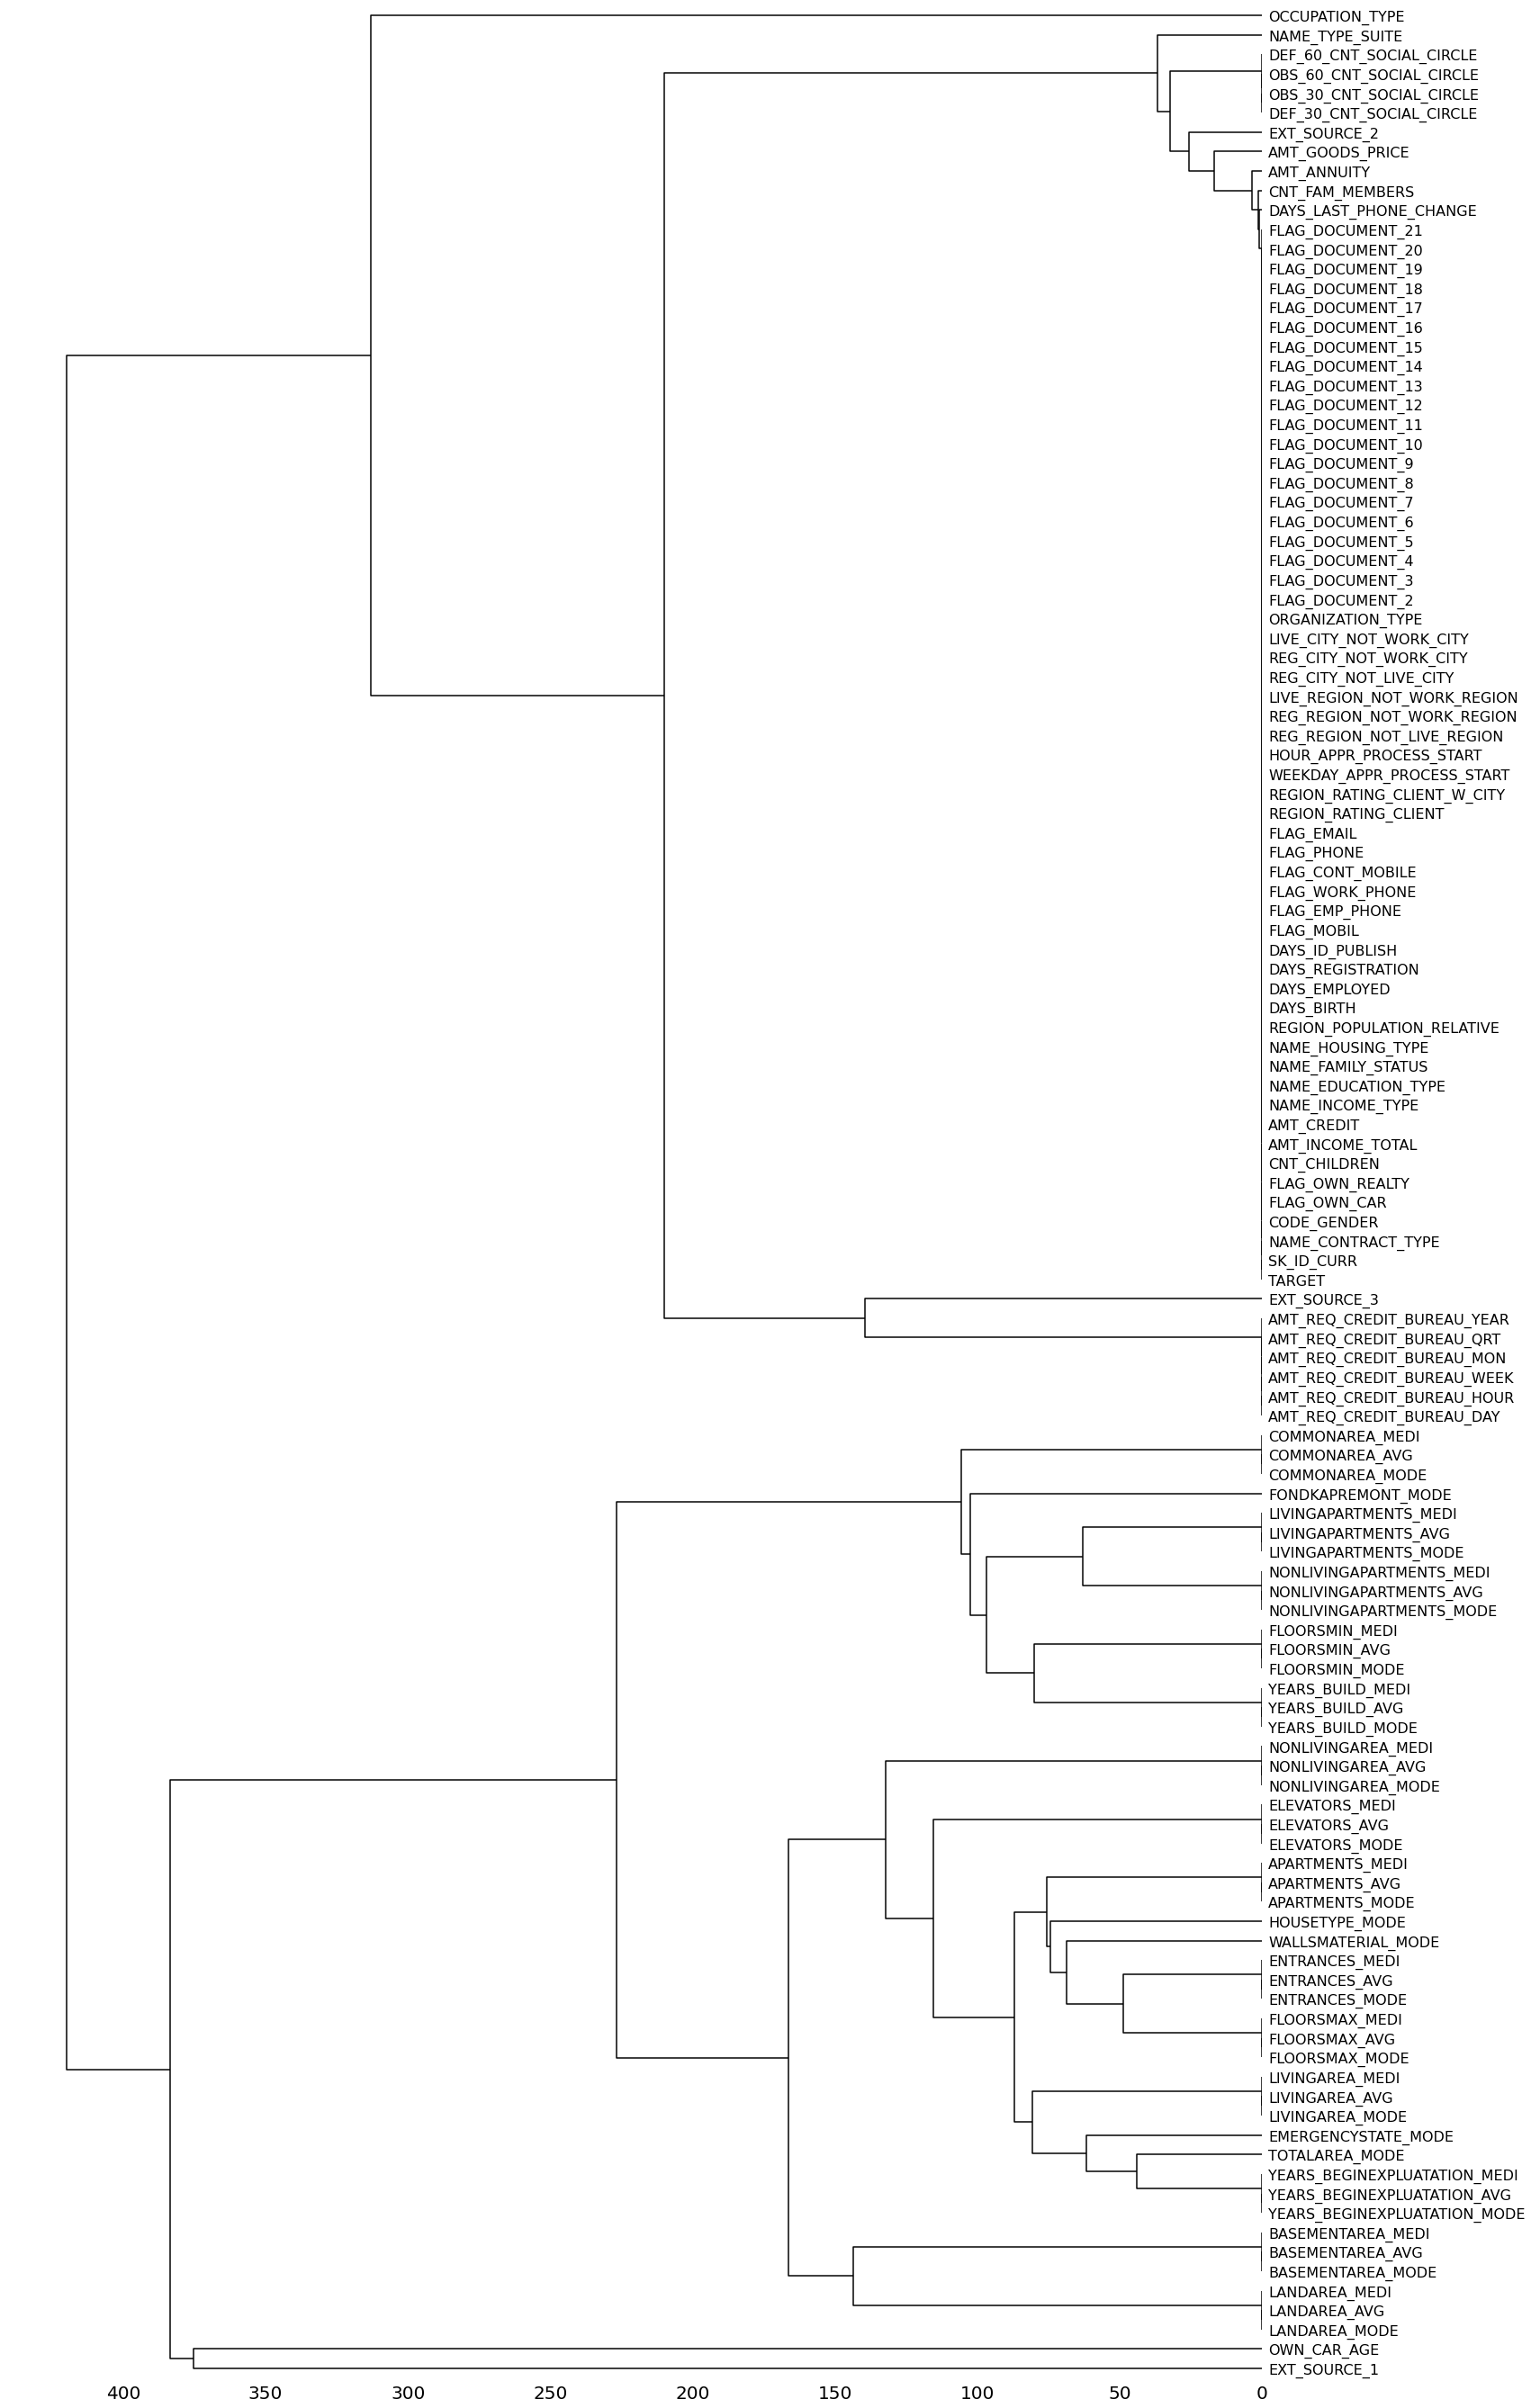

In [12]:
msno.dendrogram(application_data)

In [13]:
pd.set_option('display.max_rows', 500)

In [14]:
display(round(100*(application_data.isnull().sum()/len(application_data.index)),2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [15]:
missing_col = [col for col in application_data.columns if application_data[col].isna().sum()/application_data.shape[0] > 0]

In [16]:
missing_col


['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

In [17]:
missing_col1 = [col for col in application_data.columns if application_data[col].isna().sum()/application_data.shape[0] > 0.4]

In [18]:
missing_col1

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [19]:
application_data.drop(missing_col1, axis = 1, inplace = True)

In [20]:
application_data = application_data.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3',"OCCUPATION_TYPE"],axis=1)

In [21]:
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### MISSING values Suggestion

In [22]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

-----------------------------------------------------------------------------------------------------------------------

In [23]:
print("AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 41519


In [24]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [25]:
application_data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna("0", inplace = True)

In [26]:
print("AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 0


-----------------------------------------------------------------------------------------------------------------------

In [27]:
print("AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT : 41519


In [28]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [29]:
application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna("0", inplace = True)

In [30]:
print("AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT : 0


-----------------------------------------------------------------------------------------------------------------------

In [31]:
print("AMT_REQ_CREDIT_BUREAU_MON NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_MON NAN COUNT : 41519


In [32]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [33]:
application_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna("0", inplace = True)

In [34]:
print("AMT_REQ_CREDIT_BUREAU_MON NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_MON NAN COUNT : 0


-----------------------------------------------------------------------------------------------------------------------

In [35]:
print("AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT : 41519


In [36]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [37]:
application_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna("0", inplace = True)

In [38]:
print("AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT : 0


-----------------------------------------------------------------------------------------------------------------------

In [39]:
print("AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT : 41519


In [40]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [41]:
application_data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna("0", inplace = True)

In [42]:
print("AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT : 0


-----------------------------------------------------------------------------------------------------------------------

In [43]:
print("AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT : 41519


In [44]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [45]:
application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna("0", inplace = True)

In [46]:
print("AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT : 0


-----------------------------------------------------------------------------------------------------------------------

In [47]:
print("DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT : 1021


In [48]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [49]:
application_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna("0", inplace = True)

In [50]:
print("DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT : 0


-----------------------------------------------------------------------------------------------------------------------

In [51]:
print("DEF_60_CNT_SOCIAL_CIRCLE NAN COUNT :" ,application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_60_CNT_SOCIAL_CIRCLE NAN COUNT : 1021


In [52]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [53]:
application_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna("0", inplace = True)

In [54]:
print("DEF_60_CNT_SOCIAL_CIRCLE NAN COUNT :" ,application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_60_CNT_SOCIAL_CIRCLE NAN COUNT : 0


-----------------------------------------------------------------------------------------------------------------------

In [55]:
print("OBS_60_CNT_SOCIAL_CIRCLE :" ,application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

OBS_60_CNT_SOCIAL_CIRCLE : 1021


In [56]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [57]:
application_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna("0", inplace = True)

In [58]:
print("OBS_60_CNT_SOCIAL_CIRCLE :" ,application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

OBS_60_CNT_SOCIAL_CIRCLE : 0


-----------------------------------------------------------------------------------------------------------------------

In [59]:
print("OBS_30_CNT_SOCIAL_CIRCLE :" ,application_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

OBS_30_CNT_SOCIAL_CIRCLE : 1021


In [60]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field 

In [61]:
application_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna("0", inplace = True)

In [62]:
print("OBS_30_CNT_SOCIAL_CIRCLE :" ,application_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

OBS_30_CNT_SOCIAL_CIRCLE : 0


-----------------------------------------------------------------------------------------------------------------------

In [63]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

In [64]:
print("AMT_ANNUITY  :" ,application_data['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY  : 12


In [65]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

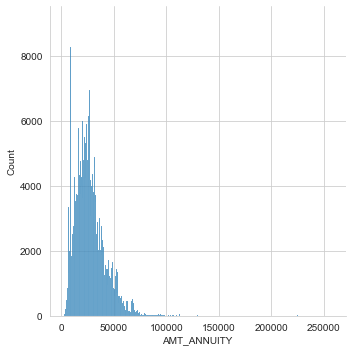

In [66]:
sns.set_style('whitegrid') 
sns.displot(application_data['AMT_ANNUITY']) 
plt.show()

### Suggestion
We can Fill NA with 0 i.e. Mean for this field as it's right skewed graph

In [67]:
application_data["AMT_ANNUITY"].fillna("0", inplace = True)

In [68]:
print("AMT_ANNUITY  :" ,application_data['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY  : 0


-----------------------------------------------------------------------------------------------------------------------

In [69]:
print("AMT_GOODS_PRICE   :" ,application_data['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE   : 278


In [70]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

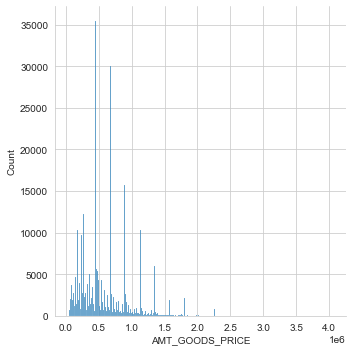

In [71]:
sns.set_style('whitegrid') 
sns.displot(application_data['AMT_GOODS_PRICE']) 
plt.show()

### Suggestion
We can Fill NA with 0 i.e. Mean for this field as it's right skewed graph

In [72]:
application_data["AMT_GOODS_PRICE"].fillna("0", inplace = True)

In [73]:
print("AMT_GOODS_PRICE   :" ,application_data['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE   : 0


-----------------------------------------------------------------------------------------------------------------------

In [74]:
print("NAME_TYPE_SUITE :" ,application_data['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE : 1292


In [75]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

### Suggestion
We can Fill NA with "Unaccompanied" i.e. Mode for this field 

In [76]:
application_data["NAME_TYPE_SUITE"].fillna("Unaccompanied", inplace = True)

In [77]:
print("NAME_TYPE_SUITE :" ,application_data['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE : 0


-----------------------------------------------------------------------------------------------------------------------

In [78]:
print("CNT_FAM_MEMBERS :" ,application_data['CNT_FAM_MEMBERS'].isnull().sum())

CNT_FAM_MEMBERS : 2


In [79]:
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

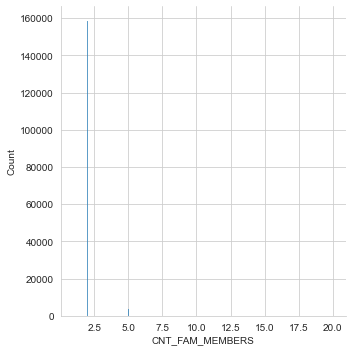

In [80]:
sns.set_style('whitegrid') 
sns.displot(application_data['CNT_FAM_MEMBERS']) 
plt.show()

### Suggestion
We can Fill NA with 2 i.e. Median for this field, Mean is not be used as this field needs to be Whole number

In [81]:
application_data["CNT_FAM_MEMBERS"].fillna("2", inplace = True)

In [82]:
print("CNT_FAM_MEMBERS :" ,application_data['CNT_FAM_MEMBERS'].isnull().sum())

CNT_FAM_MEMBERS : 0


-----------------------------------------------------------------------------------------------------------------------

In [83]:
print("DAYS_LAST_PHONE_CHANGE :" ,application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

DAYS_LAST_PHONE_CHANGE : 1


In [84]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [85]:
import statistics 
statistics.mode(application_data['DAYS_LAST_PHONE_CHANGE'])

0.0

### Suggestion
We can Fill NA with 0 i.e. Mode for this field

In [86]:
application_data["DAYS_LAST_PHONE_CHANGE"].fillna("0", inplace = True)

In [87]:
print("DAYS_LAST_PHONE_CHANGE :" ,application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

DAYS_LAST_PHONE_CHANGE : 0


-----------------------------------------------------------------------------------------------------------------------

In [88]:
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

# Converting negative values to absolute values


In [89]:
# application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
# application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
# application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
# application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])



In [90]:
# display("application_data")
# display(application_data.head())

### Separating numerical and categorical  in application_data


In [91]:
# obj_dtypes = [i for i in application_data.select_dtypes(include=np.object).columns if i not in ["type"] ]
# num_dtypes = [i for i in application_data.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [92]:
# print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
# for x in range(len(obj_dtypes)): 
#     print(obj_dtypes[x])

In [93]:
# print(color.BOLD + color.PURPLE +"Numerical Columns" + color.END, "\n")
# for x in range(len(num_dtypes)): 
#     print(num_dtypes[x])

-----------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------

In [94]:
display(round(100*(previous_application.isnull().sum()/len(previous_application.index)),2))

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [95]:
missing_colp = [col for col in previous_application.columns if previous_application[col].isna().sum()/previous_application.shape[0] > 0]
missing_colp

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [96]:
missing_colp1 = [col for col in previous_application.columns if previous_application[col].isna().sum()/previous_application.shape[0]  > 0.5]
len(missing_colp1)

4

In [97]:
missing_colp1

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

In [98]:
previous_application.drop(missing_colp1, axis = 1, inplace = True)
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [99]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

MISSING values Suggestion

In [100]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 385515


In [101]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

C:\Users\kpear\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


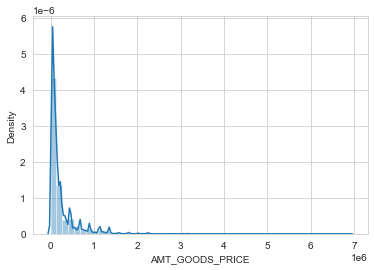

In [102]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_GOODS_PRICE']) 
plt.show()


### Suggestion
We can Fill NA with 112320 i.e. Median for this field 

In [103]:
previous_application["AMT_GOODS_PRICE"].fillna("112320", inplace = True)

In [104]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 0


------------------------------------------------

In [105]:
print("AMT_ANNUITY NULL COUNT:" ,previous_application['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY NULL COUNT: 372235


In [106]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

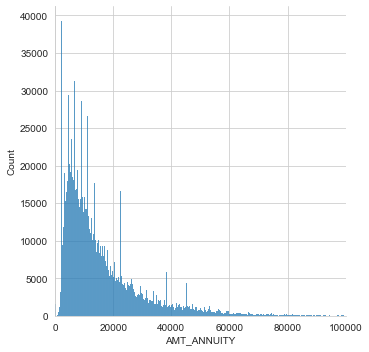

In [107]:
sns.set_style('whitegrid') 
sns.displot(previous_application['AMT_ANNUITY']) 
plt.xlim([0 ,100000])
plt.show()

Suggestion
We can Fill NA with 15955 i.e. Mean for this field

In [108]:
previous_application["AMT_ANNUITY"].fillna("15955", inplace = True)

In [109]:
print("AMT_ANNUITY NULL COUNT:" ,previous_application['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY NULL COUNT: 0


In [110]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 0


In [111]:
previous_application['AMT_GOODS_PRICE'].describe()

count     1670214
unique      93886
top        112320
freq       385515
Name: AMT_GOODS_PRICE, dtype: object

In [112]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 0


------------------------------------------------

### Suggestion
We can Fill NA with Unaccompanied  i.e. Mode for this field 

In [113]:
print("NAME_TYPE_SUITE NULL COUNT:" ,previous_application['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE NULL COUNT: 820405


In [114]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [115]:
previous_application["NAME_TYPE_SUITE"].fillna("Unaccompanied", inplace = True)

In [116]:
print("NAME_TYPE_SUITE NULL COUNT:" ,previous_application['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE NULL COUNT: 0


------------------------------------------------

In [117]:
print("CNT_PAYMENT NULL COUNT:" ,previous_application['CNT_PAYMENT'].isnull().sum())

CNT_PAYMENT NULL COUNT: 372230


In [118]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

C:\Users\kpear\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


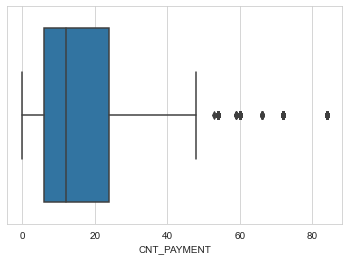

In [119]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['CNT_PAYMENT']) 
plt.show()

### Suggestion
We can Fill NA with 12 i.e. Median for this field 

In [120]:
previous_application["CNT_PAYMENT"].fillna("12", inplace = True)

In [121]:
print("CNT_PAYMENT NULL COUNT:" ,previous_application['CNT_PAYMENT'].isnull().sum())

CNT_PAYMENT NULL COUNT: 0


------------------------------------------------

In [122]:
print("DAYS_FIRST_DRAWING :" ,previous_application['CNT_PAYMENT'].isnull().sum())

DAYS_FIRST_DRAWING : 0


In [123]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

C:\Users\kpear\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


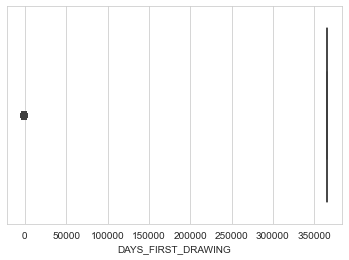

In [124]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DRAWING']) 
plt.show()

### Suggestion
We can Fill NA with 365243 i.e. Median for this field 

In [125]:
previous_application["DAYS_FIRST_DRAWING"].fillna("365243", inplace = True)

In [126]:
print("DAYS_FIRST_DRAWING :" ,previous_application['CNT_PAYMENT'].isnull().sum())

DAYS_FIRST_DRAWING : 0


------------------------------------------------

In [127]:
print("DAYS_FIRST_DUE :" ,previous_application['DAYS_FIRST_DUE'].isnull().sum())

DAYS_FIRST_DUE : 673065


In [128]:
previous_application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

C:\Users\kpear\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


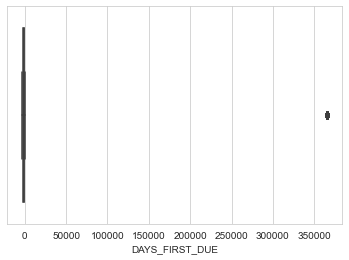

In [129]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DUE']) 
plt.show()

### Suggestion
We can Fill NA with -831 i.e. Median for this field 

In [130]:
previous_application["DAYS_FIRST_DUE"].fillna("-831", inplace = True)

In [131]:
print("DAYS_FIRST_DUE :" ,previous_application['DAYS_FIRST_DUE'].isnull().sum())

DAYS_FIRST_DUE : 0


------------------------------------------------

In [132]:
print("DAYS_LAST_DUE_1ST_VERSION :" ,previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum())

DAYS_LAST_DUE_1ST_VERSION : 673065


In [133]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

C:\Users\kpear\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


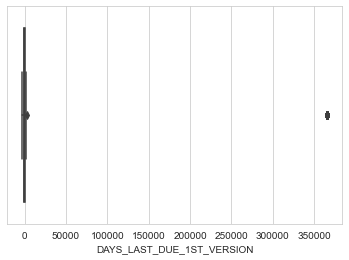

In [134]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE_1ST_VERSION']) 
plt.show()

### Suggestion
We can Fill NA with -361 i.e. Median for this field 

In [135]:
previous_application["DAYS_LAST_DUE_1ST_VERSION"].fillna("-361", inplace = True)

In [136]:
print("DAYS_LAST_DUE_1ST_VERSION :" ,previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum())

DAYS_LAST_DUE_1ST_VERSION : 0


------------------------------------------------

In [137]:
print("DAYS_LAST_DUE:" ,previous_application['DAYS_LAST_DUE'].isnull().sum())

DAYS_LAST_DUE: 673065


In [138]:
previous_application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

C:\Users\kpear\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


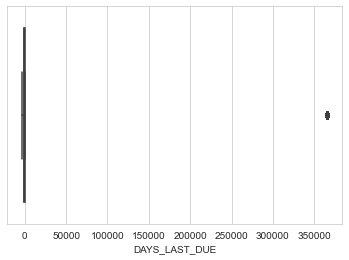

In [139]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE']) 
plt.show()

### Suggestion
We can Fill NA with -537 i.e. Median for this field 

In [140]:
previous_application["DAYS_LAST_DUE"].fillna("-537", inplace = True)

In [141]:
print("DAYS_LAST_DUE:" ,previous_application['DAYS_LAST_DUE'].isnull().sum())

DAYS_LAST_DUE: 0


------------------------------------------------

In [142]:
print("DAYS_TERMINATION :" ,previous_application['DAYS_TERMINATION'].isnull().sum())

DAYS_TERMINATION : 673065


In [143]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

C:\Users\kpear\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


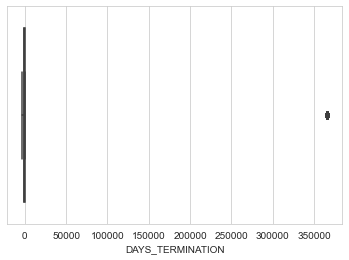

In [144]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_TERMINATION']) 
plt.show()

### Suggestion
We can Fill NA with -499 i.e. Median for this field 

In [145]:
previous_application["DAYS_TERMINATION"].fillna("-499", inplace = True)

In [146]:
print("DAYS_TERMINATION :" ,previous_application['DAYS_TERMINATION'].isnull().sum())

DAYS_TERMINATION : 0


------------------------------------------------

In [147]:
print("NFLAG_INSURED_ON_APPROVAL:" ,previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())

NFLAG_INSURED_ON_APPROVAL: 673065


In [148]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

### Suggestion
We can Fill NA with 0 i.e. Mode for this field 

In [149]:
previous_application["NFLAG_INSURED_ON_APPROVAL"].fillna("0", inplace = True)

In [150]:
print("NFLAG_INSURED_ON_APPROVAL:" ,previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())

NFLAG_INSURED_ON_APPROVAL: 0


------------------------------------------------

In [151]:
previous_application.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       1
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_TYPE_SUITE                  0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
DAYS_FIRST_DRAWING               0
DAYS_FIRST_DUE      

------------------------------------------------

In [152]:
print("AMT_CREDIT :" ,previous_application['AMT_CREDIT'].isnull().sum())

AMT_CREDIT : 1


In [153]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

C:\Users\kpear\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


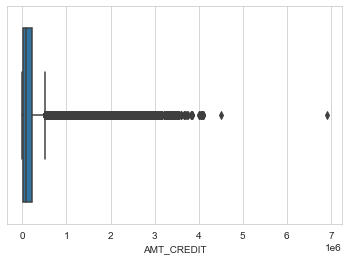

In [154]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['AMT_CREDIT']) 
plt.show()


### Suggestion
We can Fill NA with 80541 i.e. Median for this field 

In [155]:
previous_application["AMT_CREDIT"].fillna("80541", inplace = True)

In [156]:
print("AMT_CREDIT :" ,previous_application['AMT_CREDIT'].isnull().sum())

AMT_CREDIT : 0


------------------------------------------------

In [157]:
print("PRODUCT_COMBINATION :" ,previous_application['PRODUCT_COMBINATION'].isnull().sum())

PRODUCT_COMBINATION : 346


In [158]:
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

### Suggestion
We can Fill NA with Cash i.e. Mode for this field 

In [159]:
previous_application["PRODUCT_COMBINATION"].fillna("Cash", inplace = True)

In [160]:
print("PRODUCT_COMBINATION :" ,previous_application['PRODUCT_COMBINATION'].isnull().sum())

PRODUCT_COMBINATION : 0


------------------------------------------------

In [161]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Separating numerical and categorical columns from previous_application

In [162]:
obj_dtypes = [i for i in previous_application.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in previous_application.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

C:\Users\kpear\AppData\Local\Temp/ipykernel_15164/2991887911.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_dtypes = [i for i in previous_application.select_dtypes(include=np.object).columns if i not in ["type"] ]


In [163]:
print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])


Categorical Columns 

NAME_CONTRACT_TYPE
AMT_ANNUITY
AMT_CREDIT
AMT_GOODS_PRICE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


In [164]:
print(color.BOLD + color.PURPLE + 'Numerical' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Numerical 

NAME_CONTRACT_TYPE
AMT_ANNUITY
AMT_CREDIT
AMT_GOODS_PRICE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


# Previous Aplication Dataset Completed

In [165]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [166]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,365243,-831,-361,-537,-499,0


In [167]:
# Replace the values in the 'NAME_CONTRACT_STATUS' column with 1 for the applications that were high risk/denied
previous_application['NAME_CONTRACT_STATUS'] = previous_application['NAME_CONTRACT_STATUS'].replace(['Refused'],'1')


In [168]:
# Replace the values in the 'NAME_CONTRACT_STATUS' column with 0 for the remaining options
previous_application['NAME_CONTRACT_STATUS'] = previous_application['NAME_CONTRACT_STATUS'].replace(['Canceled','Approved','Unused offer'],'0')

In [169]:
# Create a new dataframe for our training data
train_df = previous_application[['SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START'
,'HOUR_APPR_PROCESS_START','NAME_TYPE_SUITE','NAME_CONTRACT_STATUS']].copy()
train_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,NAME_CONTRACT_STATUS
0,271877,Consumer loans,1730.43,17145.0,17145.0,SATURDAY,15,Unaccompanied,0
1,108129,Cash loans,25188.615,679671.0,607500.0,THURSDAY,11,Unaccompanied,0
2,122040,Cash loans,15060.735,136444.5,112500.0,TUESDAY,11,"Spouse, partner",0
3,176158,Cash loans,47041.335,470790.0,450000.0,MONDAY,7,Unaccompanied,0
4,202054,Cash loans,31924.395,404055.0,337500.0,THURSDAY,9,Unaccompanied,1
...,...,...,...,...,...,...,...,...,...
1670209,352015,Consumer loans,14704.29,311400.0,267295.5,WEDNESDAY,12,Unaccompanied,0
1670210,334635,Consumer loans,6622.02,64291.5,87750.0,TUESDAY,15,Unaccompanied,0
1670211,249544,Consumer loans,11520.855,102523.5,105237.0,MONDAY,12,"Spouse, partner",0
1670212,400317,Cash loans,18821.52,191880.0,180000.0,WEDNESDAY,9,Family,0


In [170]:
# Create a new dataframe for our testing data
test_df = application_data[['SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START'
,'HOUR_APPR_PROCESS_START','NAME_TYPE_SUITE','TARGET']].copy()
test_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,TARGET
0,100002,Cash loans,24700.5,406597.5,351000.0,WEDNESDAY,10,Unaccompanied,1
1,100003,Cash loans,35698.5,1293502.5,1129500.0,MONDAY,11,Family,0
2,100004,Revolving loans,6750.0,135000.0,135000.0,MONDAY,9,Unaccompanied,0
3,100006,Cash loans,29686.5,312682.5,297000.0,WEDNESDAY,17,Unaccompanied,0
4,100007,Cash loans,21865.5,513000.0,513000.0,THURSDAY,11,Unaccompanied,0
...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,27558.0,254700.0,225000.0,THURSDAY,15,Unaccompanied,0
307507,456252,Cash loans,12001.5,269550.0,225000.0,MONDAY,8,Unaccompanied,0
307508,456253,Cash loans,29979.0,677664.0,585000.0,THURSDAY,9,Unaccompanied,0
307509,456254,Cash loans,20205.0,370107.0,319500.0,WEDNESDAY,9,Unaccompanied,1


In [171]:
train_df.dtypes

SK_ID_CURR                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                   object
AMT_CREDIT                    object
AMT_GOODS_PRICE               object
WEEKDAY_APPR_PROCESS_START    object
HOUR_APPR_PROCESS_START        int64
NAME_TYPE_SUITE               object
NAME_CONTRACT_STATUS          object
dtype: object

In [172]:
train_df_conv = train_df[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']].astype(float, errors='raise')

In [173]:
train_df_conv.dtypes

AMT_ANNUITY        float64
AMT_CREDIT         float64
AMT_GOODS_PRICE    float64
dtype: object

In [174]:
train_df_conv

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE
0,1730.430,17145.0,17145.0
1,25188.615,679671.0,607500.0
2,15060.735,136444.5,112500.0
3,47041.335,470790.0,450000.0
4,31924.395,404055.0,337500.0
...,...,...,...
1670209,14704.290,311400.0,267295.5
1670210,6622.020,64291.5,87750.0
1670211,11520.855,102523.5,105237.0
1670212,18821.520,191880.0,180000.0


In [175]:
updated_train_df = train_df.drop(['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE'], axis = 1)
updated_train_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,NAME_CONTRACT_STATUS
0,271877,Consumer loans,SATURDAY,15,Unaccompanied,0
1,108129,Cash loans,THURSDAY,11,Unaccompanied,0
2,122040,Cash loans,TUESDAY,11,"Spouse, partner",0
3,176158,Cash loans,MONDAY,7,Unaccompanied,0
4,202054,Cash loans,THURSDAY,9,Unaccompanied,1
...,...,...,...,...,...,...
1670209,352015,Consumer loans,WEDNESDAY,12,Unaccompanied,0
1670210,334635,Consumer loans,TUESDAY,15,Unaccompanied,0
1670211,249544,Consumer loans,MONDAY,12,"Spouse, partner",0
1670212,400317,Cash loans,WEDNESDAY,9,Family,0


In [176]:
train_df = pd.concat([train_df_conv, updated_train_df], axis=1)
train_df

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,SK_ID_CURR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE,NAME_CONTRACT_STATUS
0,1730.430,17145.0,17145.0,271877,Consumer loans,SATURDAY,15,Unaccompanied,0
1,25188.615,679671.0,607500.0,108129,Cash loans,THURSDAY,11,Unaccompanied,0
2,15060.735,136444.5,112500.0,122040,Cash loans,TUESDAY,11,"Spouse, partner",0
3,47041.335,470790.0,450000.0,176158,Cash loans,MONDAY,7,Unaccompanied,0
4,31924.395,404055.0,337500.0,202054,Cash loans,THURSDAY,9,Unaccompanied,1
...,...,...,...,...,...,...,...,...,...
1670209,14704.290,311400.0,267295.5,352015,Consumer loans,WEDNESDAY,12,Unaccompanied,0
1670210,6622.020,64291.5,87750.0,334635,Consumer loans,TUESDAY,15,Unaccompanied,0
1670211,11520.855,102523.5,105237.0,249544,Consumer loans,MONDAY,12,"Spouse, partner",0
1670212,18821.520,191880.0,180000.0,400317,Cash loans,WEDNESDAY,9,Family,0


In [177]:
train_df.dtypes

AMT_ANNUITY                   float64
AMT_CREDIT                    float64
AMT_GOODS_PRICE               float64
SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
NAME_TYPE_SUITE                object
NAME_CONTRACT_STATUS           object
dtype: object

In [178]:
train_df_trim = train_df.select_dtypes(include=['object'],exclude=['number'])
train_df_trim

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_TYPE_SUITE,NAME_CONTRACT_STATUS
0,Consumer loans,SATURDAY,Unaccompanied,0
1,Cash loans,THURSDAY,Unaccompanied,0
2,Cash loans,TUESDAY,"Spouse, partner",0
3,Cash loans,MONDAY,Unaccompanied,0
4,Cash loans,THURSDAY,Unaccompanied,1
...,...,...,...,...
1670209,Consumer loans,WEDNESDAY,Unaccompanied,0
1670210,Consumer loans,TUESDAY,Unaccompanied,0
1670211,Consumer loans,MONDAY,"Spouse, partner",0
1670212,Cash loans,WEDNESDAY,Family,0


In [179]:
# Were the columns correctly converted?
train_df_trim.dtypes

NAME_CONTRACT_TYPE            object
WEEKDAY_APPR_PROCESS_START    object
NAME_TYPE_SUITE               object
NAME_CONTRACT_STATUS          object
dtype: object

In [ ]:
# yes

In [180]:
for each in train_df_trim.columns:
    
    print(train_df_trim[each].value_counts())

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
Unaccompanied      1329375
Family              213263
Spouse, partner      67069
Children             31566
Other_B              17624
Other_A               9077
Group of people       2240
Name: NAME_TYPE_SUITE, dtype: int64
0    1379536
1     290678
Name: NAME_CONTRACT_STATUS, dtype: int64


In [200]:
# Define the target for training data
y = train_df["NAME_CONTRACT_STATUS"]


In [201]:
# Define the features for the training data
X = train_df.drop("NAME_CONTRACT_STATUS", axis=1)
X.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,SK_ID_CURR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE
0,1730.430,17145.0,17145.0,271877,Consumer loans,SATURDAY,15,Unaccompanied
1,25188.615,679671.0,607500.0,108129,Cash loans,THURSDAY,11,Unaccompanied
2,15060.735,136444.5,112500.0,122040,Cash loans,TUESDAY,11,"Spouse, partner"
3,47041.335,470790.0,450000.0,176158,Cash loans,MONDAY,7,Unaccompanied
4,31924.395,404055.0,337500.0,202054,Cash loans,THURSDAY,9,Unaccompanied


In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [226]:
X_train

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,SK_ID_CURR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE
613497,3563.190,17941.5,17095.5,430505,Consumer loans,TUESDAY,9,Unaccompanied
821675,16550.505,321142.5,225000.0,150105,Cash loans,MONDAY,10,Unaccompanied
955550,34122.600,1293502.5,1129500.0,299121,Cash loans,SATURDAY,17,Unaccompanied
1015863,2250.000,45000.0,45000.0,170623,Revolving loans,THURSDAY,14,Unaccompanied
567494,9166.635,81864.0,67500.0,429751,Cash loans,FRIDAY,10,Unaccompanied
...,...,...,...,...,...,...,...,...
259178,15955.000,0.0,112320.0,313475,Cash loans,FRIDAY,16,Unaccompanied
1414414,15955.000,0.0,112320.0,419026,Revolving loans,MONDAY,10,Unaccompanied
131932,9342.135,102010.5,94135.5,391276,Consumer loans,THURSDAY,19,Unaccompanied
671155,15955.000,0.0,112320.0,307283,Cash loans,THURSDAY,12,Unaccompanied


In [224]:
X[:3]

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,SK_ID_CURR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_TYPE_SUITE
0,1730.430,17145.0,17145.0,271877,Consumer loans,SATURDAY,15,Unaccompanied
1,25188.615,679671.0,607500.0,108129,Cash loans,THURSDAY,11,Unaccompanied
2,15060.735,136444.5,112500.0,122040,Cash loans,TUESDAY,11,"Spouse, partner"


In [220]:
columns_to_encode = [('NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE')]
X_train[columns_to_encode]

C:\Users\kpear\AppData\Local\Temp/ipykernel_15164/1167543859.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X_train[columns_to_encode]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [248]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder

dataset = X_train

# Define which columns should be encoded vs scaled
columns_to_encode = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE']
columns_to_scale  = ['AMT_ANNUITY', 'AMT_CREDIT','AMT_GOODS_PRICE','SK_ID_CURR',
                     'HOUR_APPR_PROCESS_START']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

ohe.fit(dataset.select_dtypes('object'))

# Scale and Encode Separate Columns
scaled_columns  = pd.DataFrame(scaler.fit_transform(dataset[columns_to_scale]),index=dataset.index,columns=columns_to_scale)
encoded_columns = pd.DataFrame(ohe.transform(dataset.select_dtypes('object')),index=dataset.index, columns=ohe.get_feature_names().tolist())


# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = pd.concat([scaled_columns, encoded_columns], axis=1)
processed_data

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,SK_ID_CURR,HOUR_APPR_PROCESS_START,x0_Cash loans,x0_Consumer loans,x0_Revolving loans,x0_XNA,x1_FRIDAY,...,x1_THURSDAY,x1_TUESDAY,x1_WEDNESDAY,x2_Children,x2_Family,x2_Group of people,x2_Other_A,x2_Other_B,"x2_Spouse, partner",x2_Unaccompanied
613497,-0.949851,-0.559431,-0.655501,1.478715,-1.043944,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
821675,0.045252,0.392221,0.084685,-1.248254,-0.744157,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
955550,1.391647,3.444153,3.304906,0.200969,1.354349,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1015863,-1.050469,-0.474503,-0.556155,-1.048710,0.454989,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
567494,-0.520509,-0.358798,-0.476050,1.471382,-0.744157,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-0.000376,-0.615743,-0.316481,0.340566,1.054563,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1414414,-0.000376,-0.615743,-0.316481,1.367079,-0.744157,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131932,-0.507062,-0.295565,-0.381221,1.097202,1.953923,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
671155,-0.000376,-0.615743,-0.316481,0.280347,-0.144584,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [249]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder

dataset2 = X_test

# Define which columns should be encoded vs scaled
columns_to_encode = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE']
columns_to_scale  = ['AMT_ANNUITY', 'AMT_CREDIT','AMT_GOODS_PRICE','SK_ID_CURR',
                     'HOUR_APPR_PROCESS_START']


# Scale and Encode Separate Columns
scaled_columns2  = pd.DataFrame(scaler.transform(dataset2[columns_to_scale]),index=dataset2.index,columns=columns_to_scale)
encoded_columns2 = pd.DataFrame(ohe.transform(dataset2.select_dtypes('object')),index=dataset2.index, columns=ohe.get_feature_names().tolist())


# Concatenate (Column-Bind) Processed Columns Back Together
processed_data2 = pd.concat([scaled_columns2, encoded_columns2], axis=1)
processed_data2

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,SK_ID_CURR,HOUR_APPR_PROCESS_START,x0_Cash loans,x0_Consumer loans,x0_Revolving loans,x0_XNA,x1_FRIDAY,...,x1_THURSDAY,x1_TUESDAY,x1_WEDNESDAY,x2_Children,x2_Family,x2_Group of people,x2_Other_A,x2_Other_B,"x2_Spouse, partner",x2_Unaccompanied
876718,-0.815388,-0.533880,-0.618044,-1.469455,-0.744157,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1463966,0.289477,-0.097150,-0.235735,-0.579845,-1.343731,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
354631,-0.969656,-0.513542,-0.587540,-1.695870,-0.444371,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
408441,-0.386735,0.140516,0.141464,1.077499,-1.043944,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37031,-0.000376,-0.615743,-0.316481,1.041476,0.155203,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738518,-0.659899,-0.534798,-0.617595,-0.084342,-0.444371,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
326641,0.524904,0.160375,0.084685,0.172873,-1.043944,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1590792,-0.754601,-0.410238,-0.483259,0.043244,1.054563,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1175986,-0.000376,-0.615743,-0.316481,-0.305592,0.155203,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [251]:
classifier = LogisticRegression()
classifier.fit(processed_data, y_train)
print(f"Training Data Score: {classifier.score(processed_data, y_train)}")
print(f"Testing Data Score: {classifier.score(processed_data2, y_test)}")

C:\Users\kpear\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Data Score: 0.8299857902383727
Testing Data Score: 0.8295837185130546


In [252]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(processed_data2)
confusion_matrix(y_true, y_pred)

array([[340093,   4831],
       [ 66327,   6303]], dtype=int64)

In [254]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91    344924
           1       0.57      0.09      0.15     72630

    accuracy                           0.83    417554
   macro avg       0.70      0.54      0.53    417554
weighted avg       0.79      0.83      0.77    417554

